In [ ]:
# librerias
!pip install fbprophet
!pip install holidays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


# **Proyecto 2**

1) Fuente de datos

2) Breve descripción de datos

3) ¿Cuál es el objetivo?

4) ¿Este es un problema de clasificación o regresión?

5) ¿Cuántas características hay?

6) ¿Cuántas filas de datos hay?

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

# **Wallmart**



1.   https://www.kaggle.com/datasets/ujjwalchowdhury/walmartcleaned
2.   There are sales data available for 45 stores of Walmart
3.   el objetivo de este proyecto es generar series de tiempo en que se logren ver las variaciones en las tendencias de consumo
4.   es un problema de regresion
5.   hay 16 tipos de columnas
6.   hay 421570 filas
7.   Este dataset viene limpio pero es muy grande asi que el EDA se basara en determinar cuales datos son relevantes para el objetivo de poder generar series de tiempo.









Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dl = "/content/drive/MyDrive/walmart_cleaned.csv"
df = pd.read_csv(dl)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [ ]:
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
df.shape

(421570, 16)

In [ ]:
df.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [ ]:
print(df.isnull().sum())

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

In [ ]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
df['Date'].unique()

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   IsHoliday     421570 non-null  int64         
 3   Dept          421570 non-null  float64       
 4   Weekly_Sales  421570 non-null  float64       
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

In [ ]:
df['IsHoliday'].unique()

array([0, 1])

In [ ]:
df['Dept'].unique()

array([ 1., 26., 17., 45., 28., 79., 55.,  5., 58.,  7., 83.,  9., 87.,
       34., 19., 52., 74., 38., 93., 23., 16., 95.,  2., 27., 51.,  4.,
       80., 29., 56., 31., 33.,  8., 85., 67., 46., 90., 12., 54., 14.,
       94., 97., 42., 49., 47., 91.,  3., 21., 32., 81., 30., 44., 36.,
       48., 22., 60., 35., 24., 82., 13., 40., 25., 10., 18., 59., 41.,
       20., 37., 72., 92., 71., 11.,  6., 98., 78., 96., 99., 77., 39.,
       50., 43., 65.])

In [ ]:
df['Weekly_Sales'].unique()

array([24924.5 , 11737.12, 13223.76, ...,  1104.16, 26240.14,  1076.8 ])

In [ ]:
df['Temperature'].unique()

array([42.31, 38.51, 39.93, ..., 75.87, 77.55, 74.09])

In [ ]:
df['Fuel_Price'].unique()

array([2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.72 , 2.732, 2.719,
       2.77 , 2.808, 2.795, 2.78 , 2.835, 2.854, 2.826, 2.759, 2.705,
       2.668, 2.637, 2.653, 2.669, 2.642, 2.623, 2.608, 2.64 , 2.627,
       2.692, 2.664, 2.619, 2.577, 2.565, 2.582, 2.624, 2.603, 2.633,
       2.725, 2.716, 2.689, 2.728, 2.771, 2.735, 2.708, 2.843, 2.869,
       2.886, 2.943, 2.976, 2.983, 3.016, 3.01 , 2.989, 3.022, 3.045,
       3.065, 3.288, 3.459, 3.488, 3.473, 3.524, 3.622, 3.743, 3.807,
       3.81 , 3.906, 3.899, 3.907, 3.786, 3.699, 3.648, 3.637, 3.594,
       3.48 , 3.575, 3.651, 3.682, 3.684, 3.638, 3.554, 3.523, 3.533,
       3.546, 3.526, 3.467, 3.355, 3.285, 3.274, 3.353, 3.372, 3.332,
       3.297, 3.308, 3.236, 3.172, 3.158, 3.159, 3.112, 3.129, 3.157,
       3.261, 3.268, 3.29 , 3.36 , 3.409, 3.51 , 3.555, 3.63 , 3.669,
       3.734, 3.787, 3.845, 3.891, 3.877, 3.814, 3.749, 3.688, 3.561,
       3.501, 3.452, 3.393, 3.346, 3.286, 3.227, 3.256, 3.311, 3.407,
       3.417, 3.494,

In [ ]:
df['MarkDown1'].unique()

array([    0.  , 10382.9 ,  6074.12, ...,  1956.28,  2004.02,  4018.91])

In [ ]:
df['MarkDown2'].unique()

array([   0.  , 6115.67,  254.39, ...,   92.28,   20.64,   58.08])

In [ ]:
df['MarkDown3'].unique()

array([  0.  , 215.07,  51.98, ...,  18.82,   7.89,   3.18])

In [ ]:
df['MarkDown4'].unique()

array([   0.  , 2406.62,  427.39, ...,  599.32,  437.73,  211.94])

In [ ]:
df['MarkDown5'].unique()

array([   0.  , 6551.42, 5988.57, ..., 3990.54, 1537.49,  858.33])

In [ ]:
df['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

In [ ]:
df['Unemployment'].unique()

array([ 8.106,  7.808,  7.787,  7.838,  7.742,  7.682,  7.962,  7.866,
        7.348,  7.143,  6.908,  6.573,  8.324,  8.2  ,  8.099,  8.163,
        8.028,  7.931,  7.852,  7.441,  7.057,  6.891,  6.565,  6.17 ,
        7.368,  7.343,  7.346,  7.564,  7.551,  7.574,  7.567,  7.197,
        6.833,  6.664,  6.334,  6.034,  8.623,  7.896,  7.372,  7.127,
        6.51 ,  5.946,  5.644,  5.143,  4.607,  4.308,  4.077,  3.879,
        6.566,  6.465,  6.496,  6.768,  6.634,  6.489,  6.529,  6.3  ,
        5.943,  5.801,  5.603,  5.422,  7.259,  7.092,  6.973,  7.007,
        6.858,  6.855,  6.925,  6.551,  6.132,  5.964,  5.668,  5.329,
        9.014,  8.963,  9.017,  9.137,  8.818,  8.595,  8.622,  8.513,
        8.256,  8.09 ,  7.872,  7.557,  6.299,  6.29 ,  6.315,  6.433,
        6.262,  6.297,  6.425,  6.123,  5.825,  5.679,  5.401,  5.124,
        6.415,  6.384,  6.442,  6.56 ,  6.416,  6.38 ,  6.404,  6.054,
        5.667,  5.539,  5.277,  4.954,  9.765,  9.524,  9.199,  9.003,
      

In [ ]:
df['Type'].unique()

array([3, 2, 1])

In [ ]:
df['Size'].unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221])

obs 1 las fechas especiales se trataran de acuerdo a lo comentado con el profesor

Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# **Graficos**

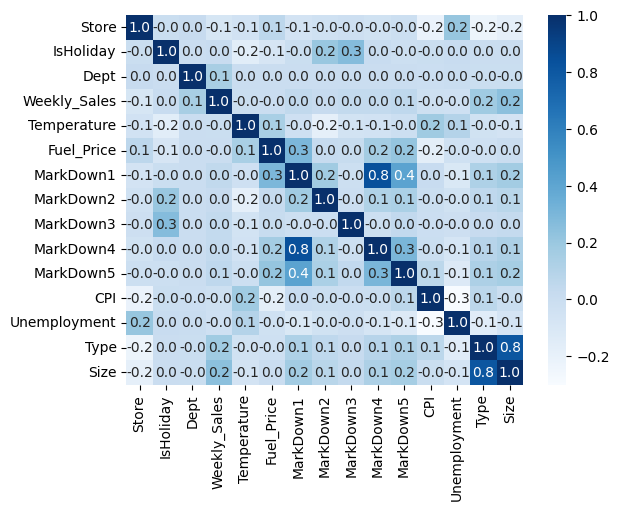

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt=".1f", cmap='Blues');

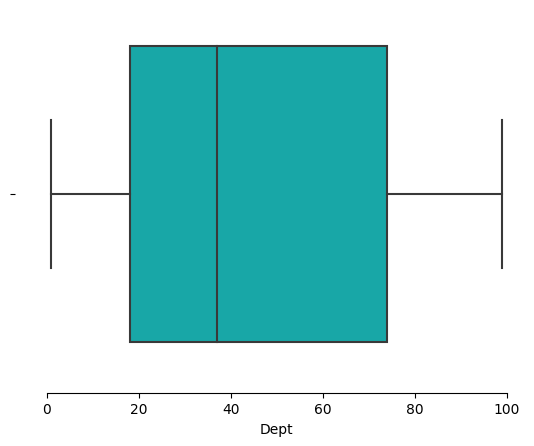

In [ ]:
sns.boxplot(x="Dept", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

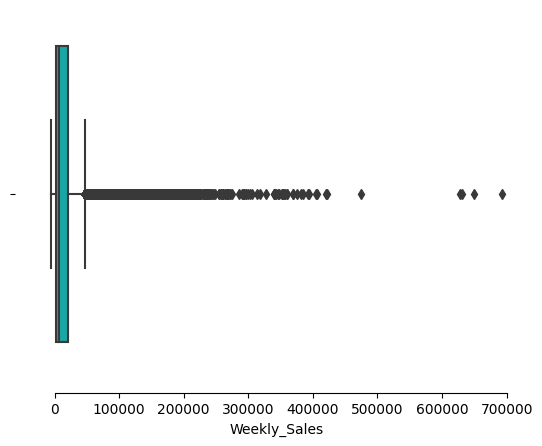

In [ ]:
sns.boxplot(x="Weekly_Sales", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

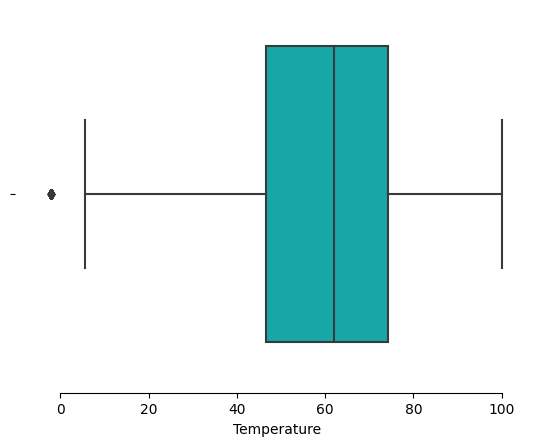

In [ ]:
sns.boxplot(x="Temperature", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

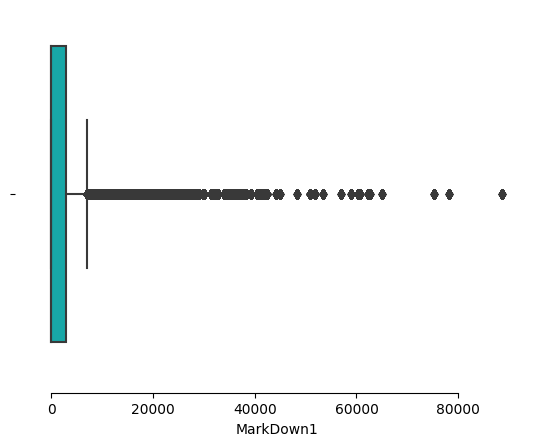

In [ ]:
sns.boxplot(x="MarkDown1", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

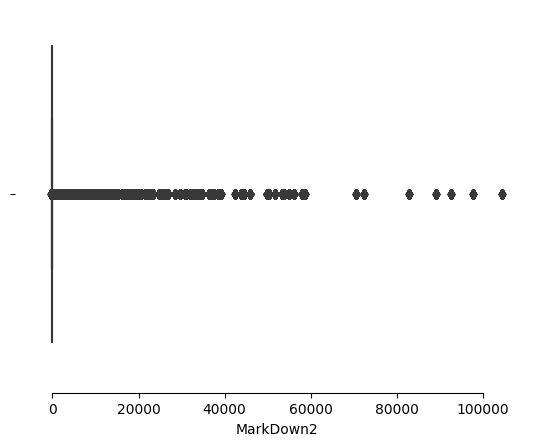

In [ ]:
sns.boxplot(x="MarkDown2", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

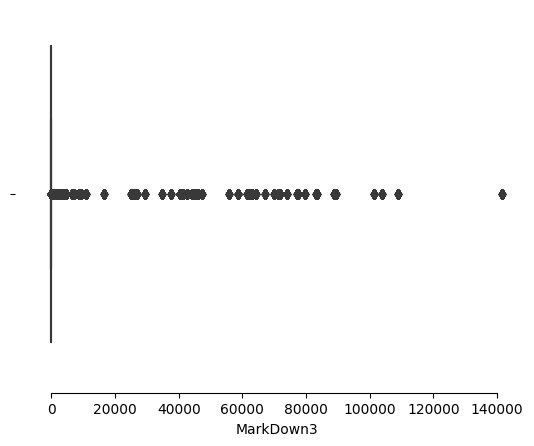

In [ ]:
sns.boxplot(x="MarkDown3", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

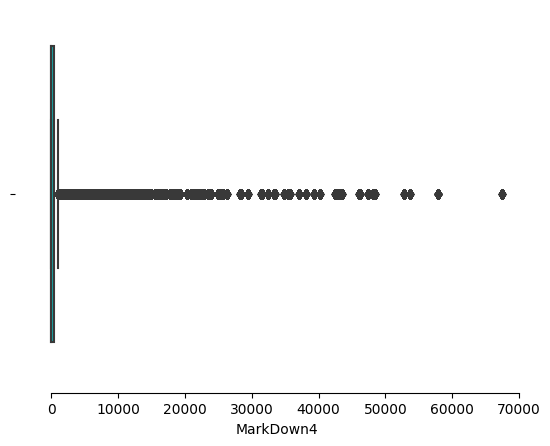

In [ ]:
sns.boxplot(x="MarkDown4", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

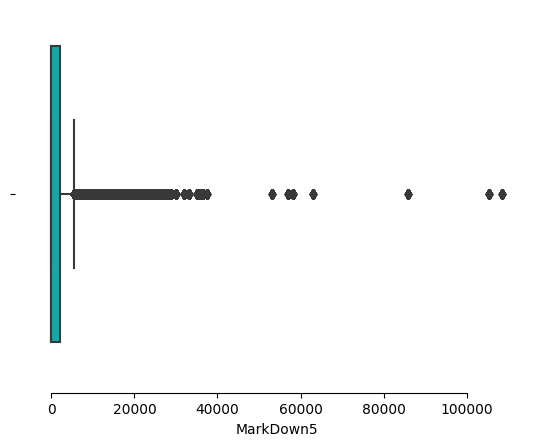

In [ ]:
sns.boxplot(x="MarkDown5", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

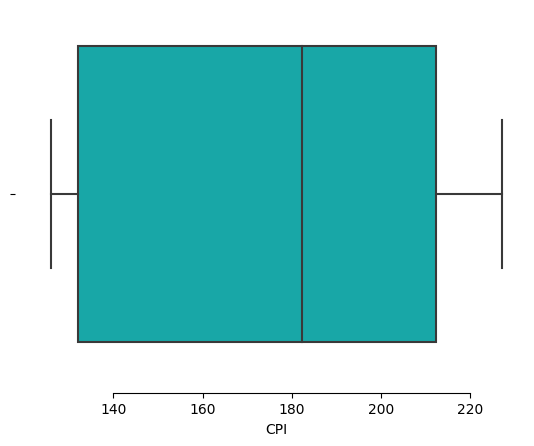

In [ ]:
sns.boxplot(x="CPI", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

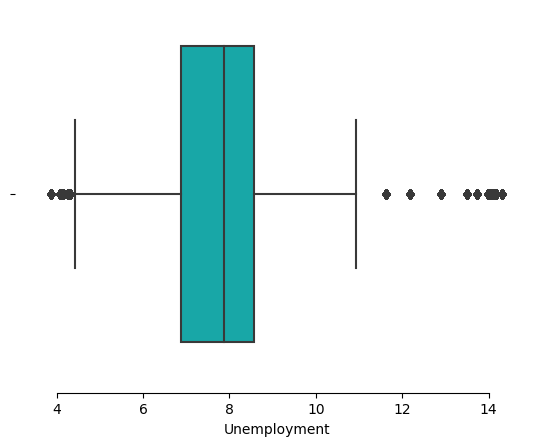

In [ ]:
sns.boxplot(x="Unemployment", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

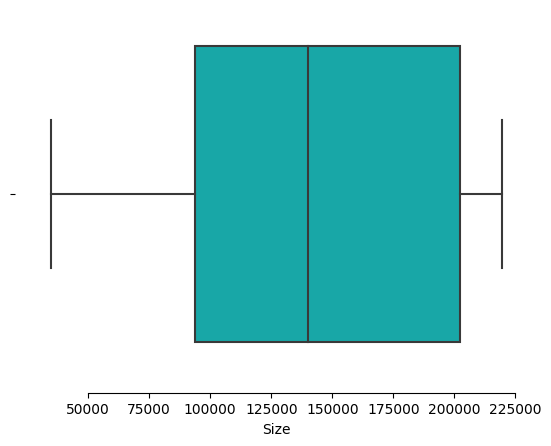

In [ ]:
sns.boxplot(x="Size", palette=["c", "g"],data=df)
sns.despine(offset=10, trim=True)

como se esperaba las columnas de markdown y de sales presentan muchos valores atipicos, por ahora no eliminaremos ninguna columna ya que es una entrega posterior se determinara la importancia de cada una de ellas para nuestras series.

**Series de Tiempo**

In [ ]:
# Disable warnings
warnings.filterwarnings('ignore')
# High resolution
%config InlineBackend.figure_format = 'retina'

In [ ]:
# forge new dataframe with date and adjusted closing price
df1 = df[['Date','Weekly_Sales']]
# adjust column names for prophet compliance
df1.columns = ['ds','y']

In [ ]:
#reviso el df
df1.tail()

,ds,y
421565,2012-10-26,26240.14
421566,2012-10-26,2660.02
421567,2012-10-26,4131.54
421568,2012-10-26,717.82
421569,2012-10-26,1076.80


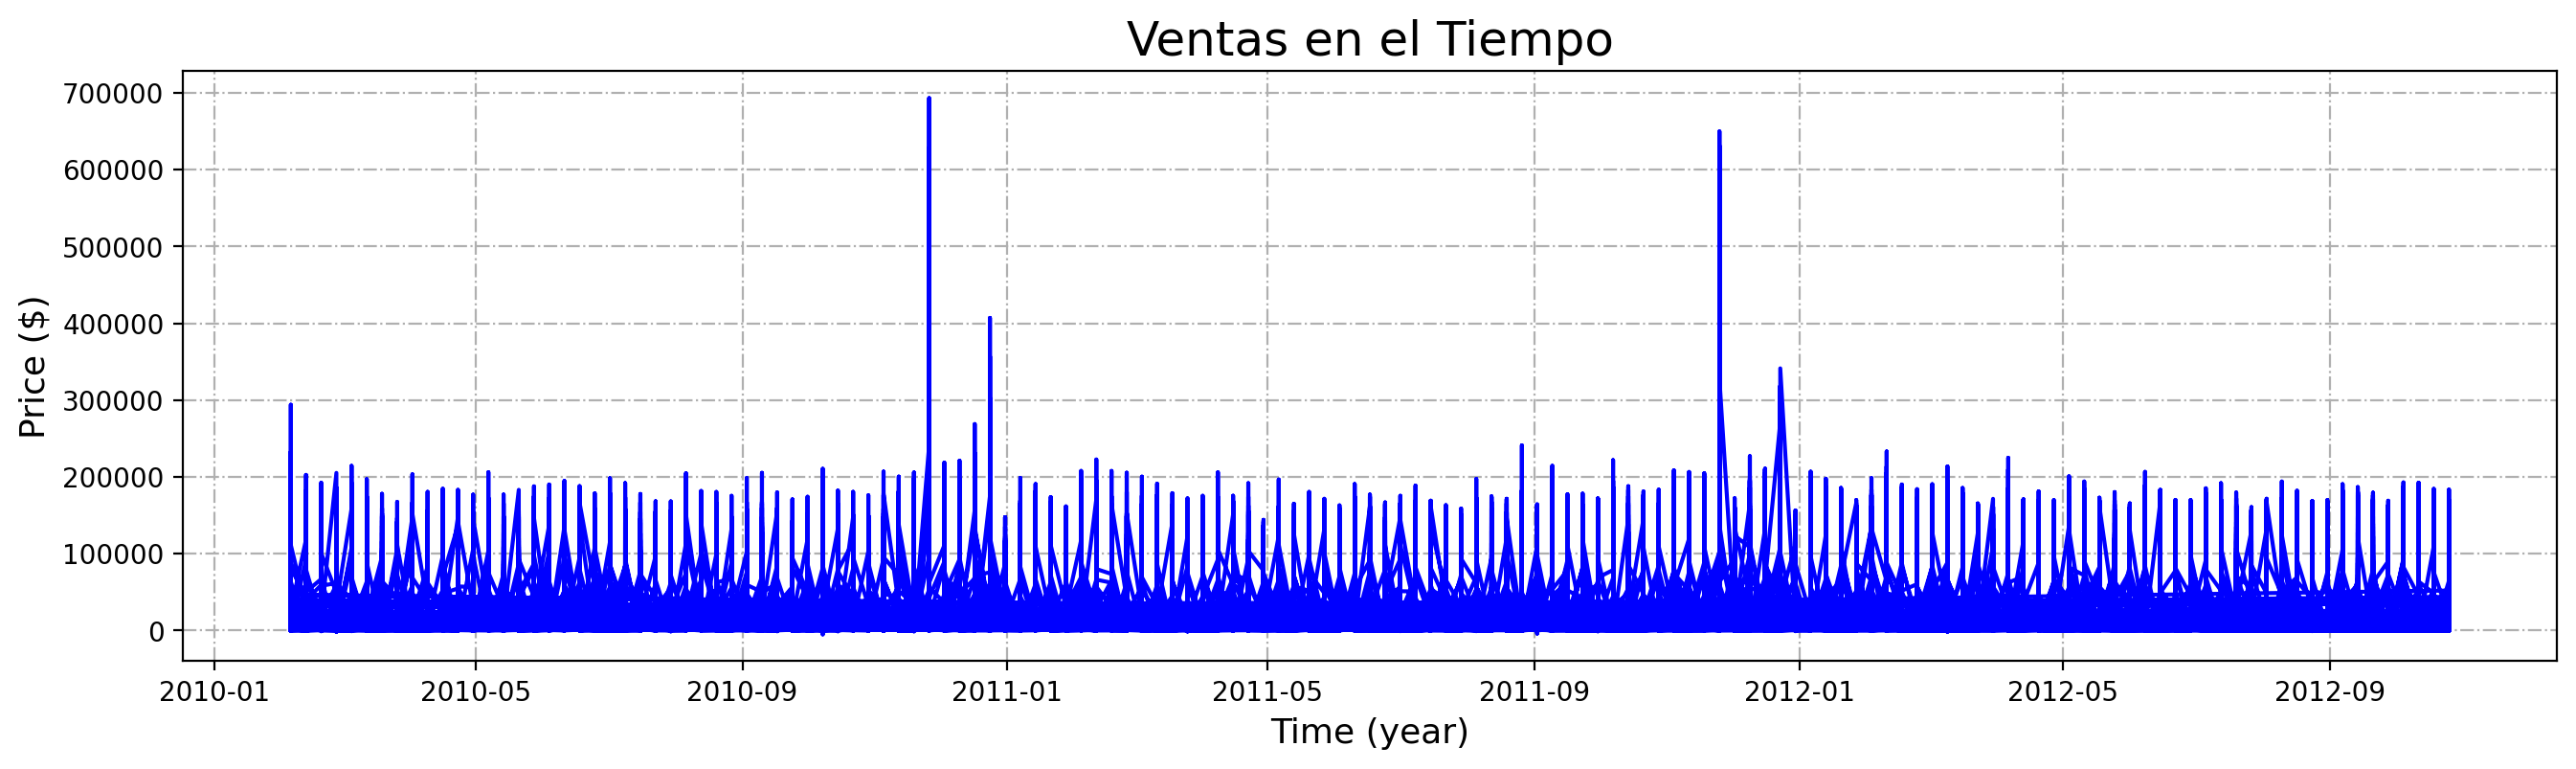

In [ ]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(df1.ds, df1.y, 'b')

# set title & labels
plt.title('Ventas en el Tiempo', fontsize=18)
plt.ylabel('Price ($)', fontsize=13)
plt.xlabel('Time (year)', fontsize=13)

# display graph
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/4upebo48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/xvkmizh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36783', 'data', 'file=/tmp/tmpcmbzwht0/4upebo48.json', 'init=/tmp/tmpcmbzwht0/xvkmizh3.json', 'output', 'file=/tmp/tmpcmbzwht0/prophet_modelrs2yk2mc/prophet_model-20230921223456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:34:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:35:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


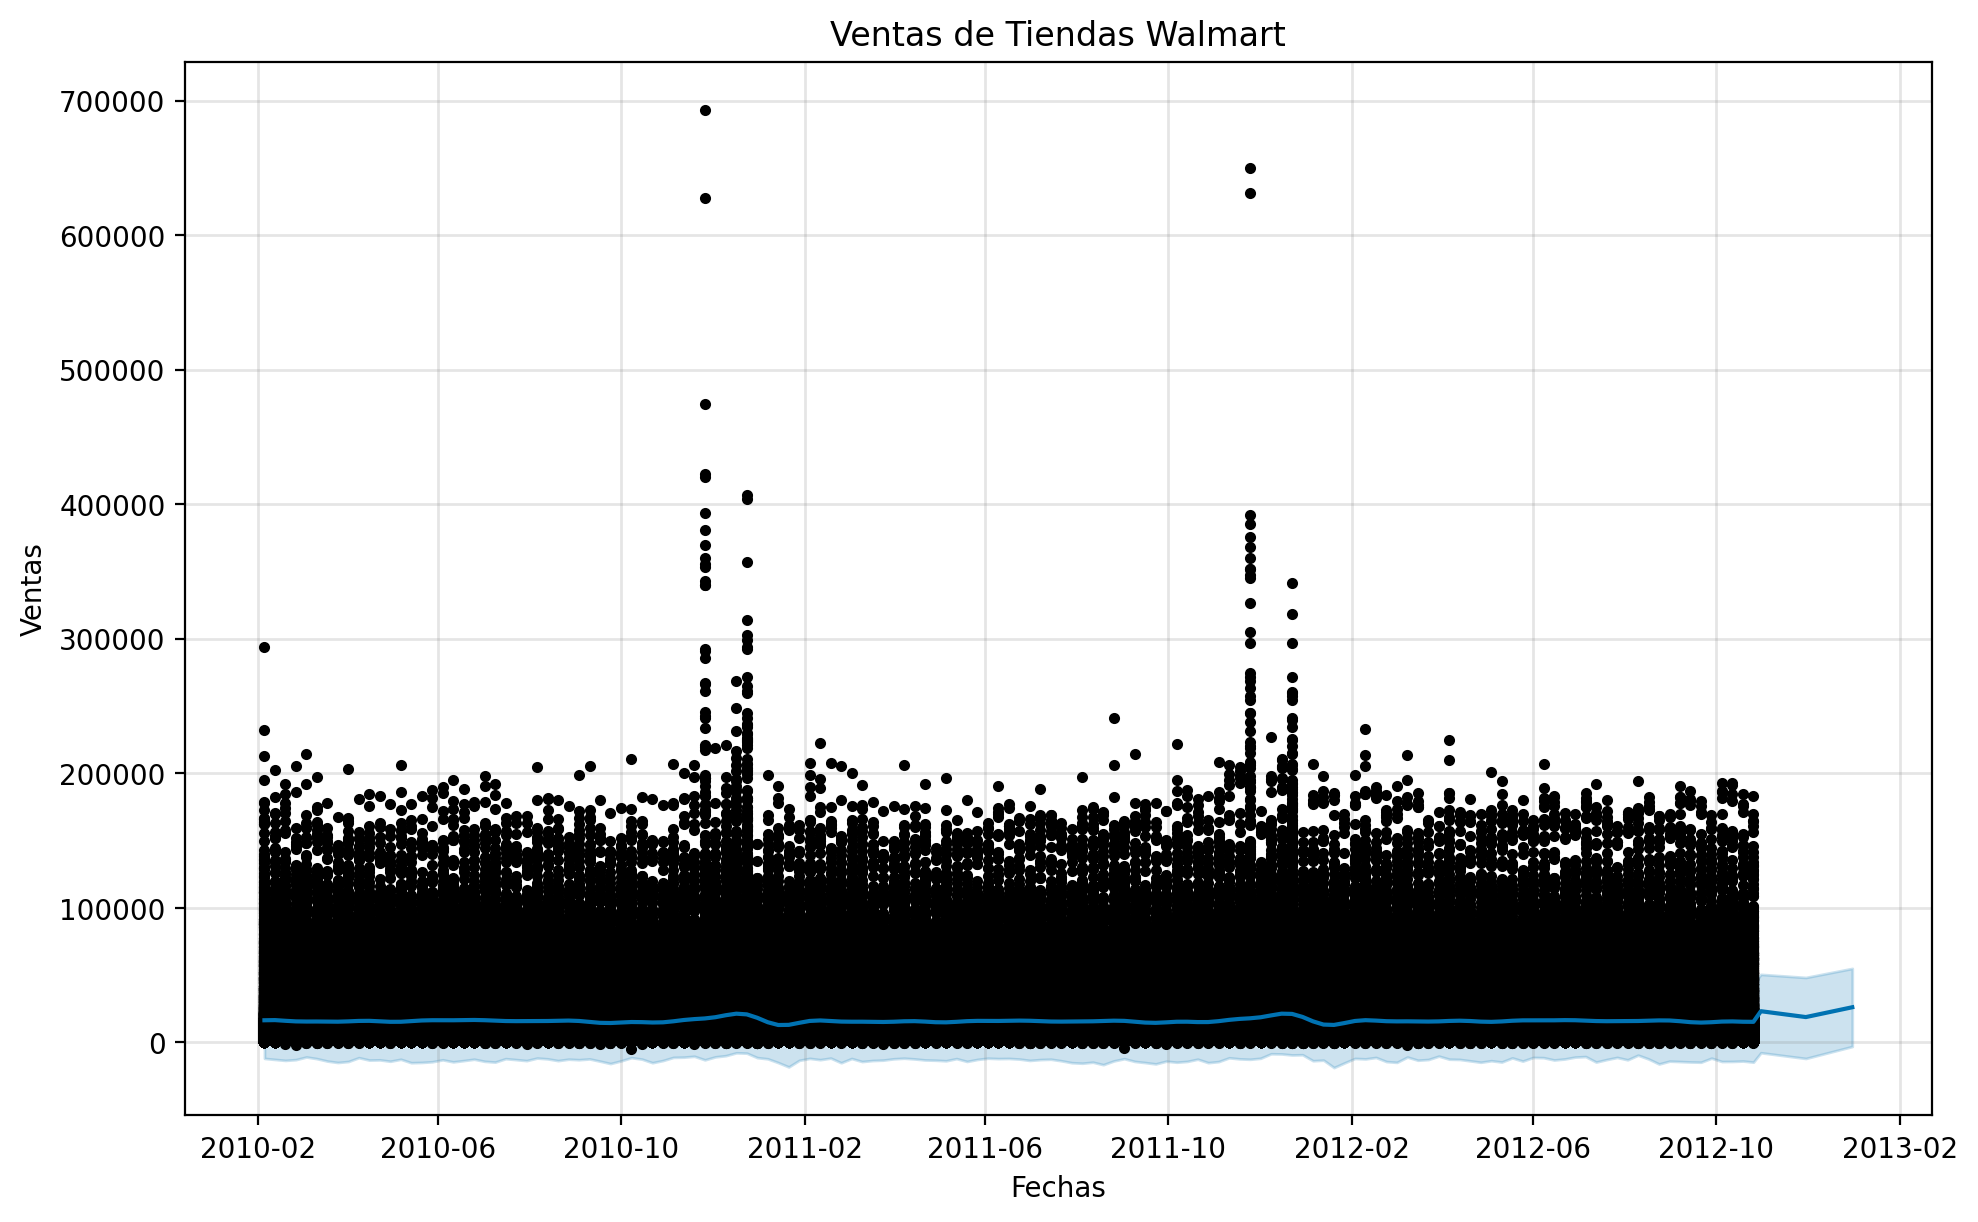

78.90647530555725

In [ ]:
myTime = time.time()

# set prophet model
prophet = Prophet(changepoint_prior_scale=0.05, weekly_seasonality=True,)

# fit df1 data to model
prophet.fit(df1)

# build future dataframe for 3 months
build_forecast = prophet.make_future_dataframe(periods=1*3, freq='M')

# forecast future df with model
forecast = prophet.predict(build_forecast)

# plot forecasts
prophet.plot(forecast, xlabel='Fechas', ylabel='Ventas')
plt.title('Ventas de Tiendas Walmart')
plt.show()

time.time() - myTime

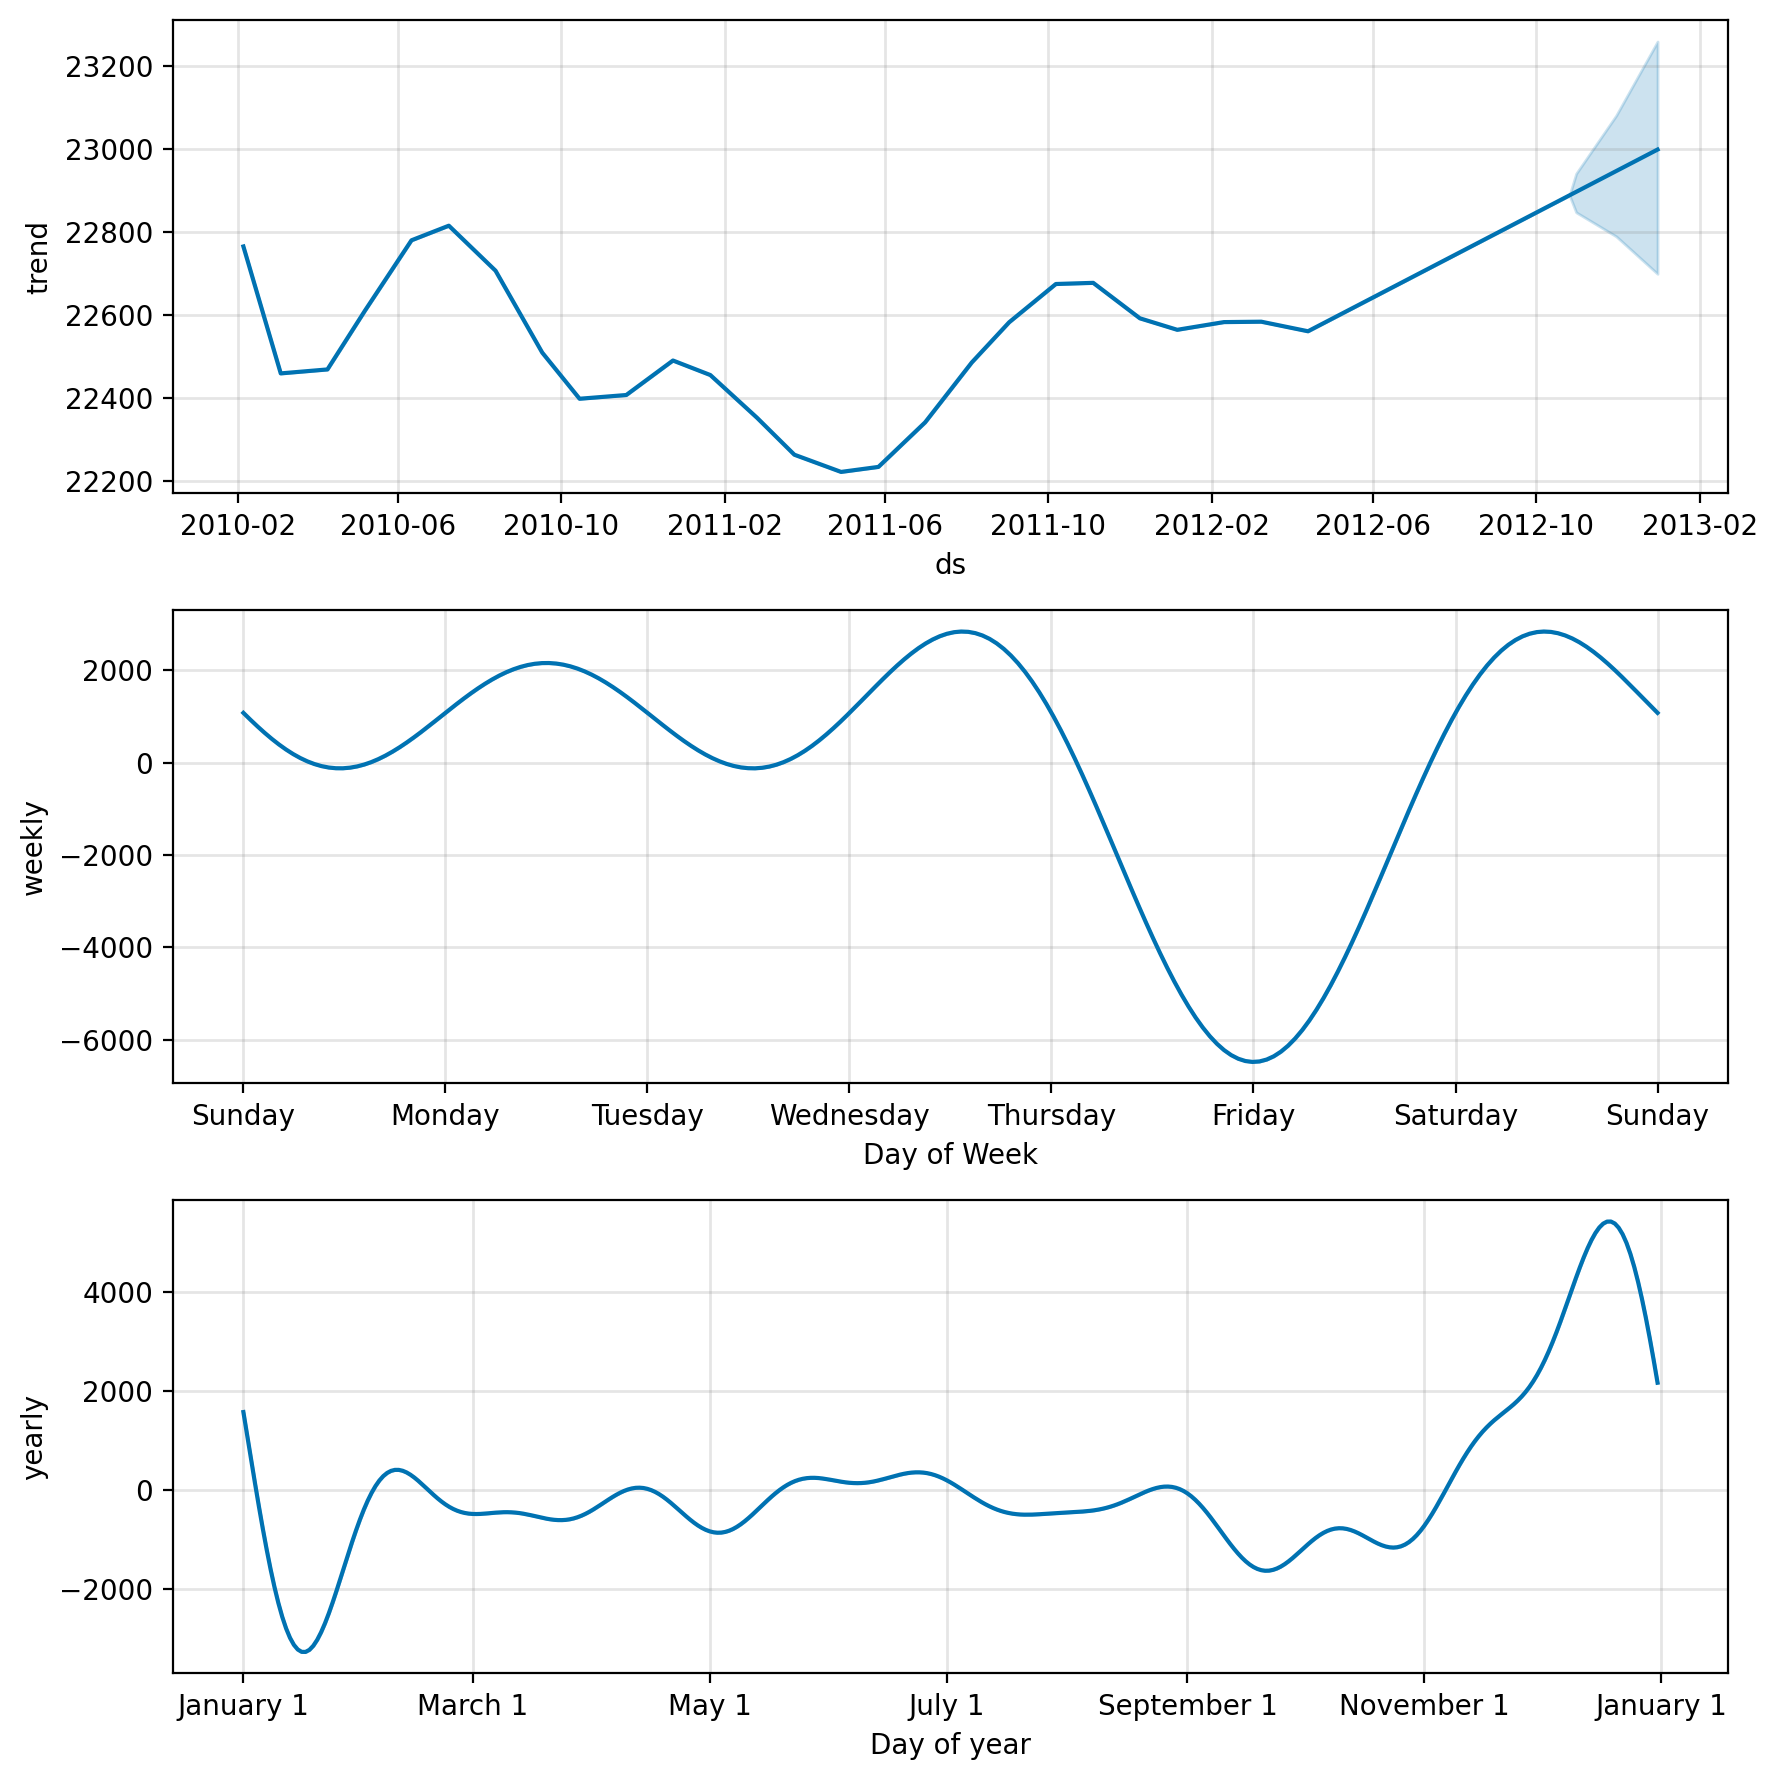

In [ ]:
# tell us more about the forecast
components = prophet.plot_components(forecast)

In [ ]:
# narrow selection to dates past initial dataframe
future_preds = forecast.loc[forecast.ds>'2012-10-26']
# select date, prediction, lower and upper limits
future_preds = future_preds[['ds','yhat','yhat_lower','yhat_upper']]
# display some predictions
future_preds.head()

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-31,23182.733432,-7677.847162,50568.338107
144,2012-11-30,18822.922771,-11933.374134,48266.156893
145,2012-12-31,26125.418218,-3023.655694,54993.013633


In [ ]:
myTime = time.time()

wmt_cv = cross_validation(prophet, initial='740 days', period='90 days', horizon = '90 days')

time.time() - myTime

INFO:prophet:Making 2 forecasts with cutoffs between 2012-04-29 00:00:00 and 2012-07-28 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/2cgorr15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/7y26xq4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75115', 'data', 'file=/tmp/tmpcmbzwht0/2cgorr15.json', 'init=/tmp/tmpcmbzwht0/7y26xq4g.json', 'output', 'file=/tmp/tmpcmbzwht0/prophet_modeli0ev8css/prophet_model-20230921223720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:37:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/ku7ze5se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmbzwht0/h6rw3gc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

137.99291014671326

In [ ]:
wmt_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-05-04,15071.46209,-14484.279499,43643.008899,244.02,2012-04-29
1,2012-05-04,15071.46209,-13596.576489,45811.625561,6243.80,2012-04-29
2,2012-05-04,15071.46209,-14421.048727,44732.238191,7189.91,2012-04-29
3,2012-05-04,15071.46209,-15741.604491,41715.802057,35473.37,2012-04-29
4,2012-05-04,15071.46209,-13545.608248,44965.009615,3922.62,2012-04-29


In [ ]:
wmt_pm = performance_metrics(wmt_cv)

INFO:prophet:Skipping MAPE because y close to 0


In [ ]:
wmt_pm.tail(3)

,horizon,mse,rmse,mae,mdape,smape,coverage
21,83 days,4.646493e+08,21555.724732,14347.103435,0.942987,1.018392,0.909849
22,89 days,4.464971e+08,21130.477309,14309.720131,1.076007,1.022041,0.911243
23,90 days,4.414036e+08,21009.608125,14145.125409,0.990009,1.016627,0.910013


https://facebook.github.io/prophet/docs/quick_start.html#python-api

https://colab.research.google.com/github/CenticMurcia/curso-ciencia-datos/blob/master/3.2-time-series/1-Prophet(Walmart)/1_TimeSeries_with_Prophet_Walmart.ipynb#scrollTo=9dynKq2O-jH9


file:///C:/Users/Usuario/Desktop/Montgomery.pdf

https://www.kaggle.com/code/adityaecdrid/my-first-time-series-comp-added-prophet